# JHILAM ROY_TSF_DSBA_INTERN'20

#  TSF_DSBA_TASK-3

# CLASSIFICATION USING DECISION TREE

### PROBLEM:CREATING DECISION TREE CLASSIFIER AND VISUALIZE IT GRAPHICALLY

IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

LOADING THE DATASET

In [15]:
iris=pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [6]:
iris.shape

(150, 6)

VISUALISING THE DATASET

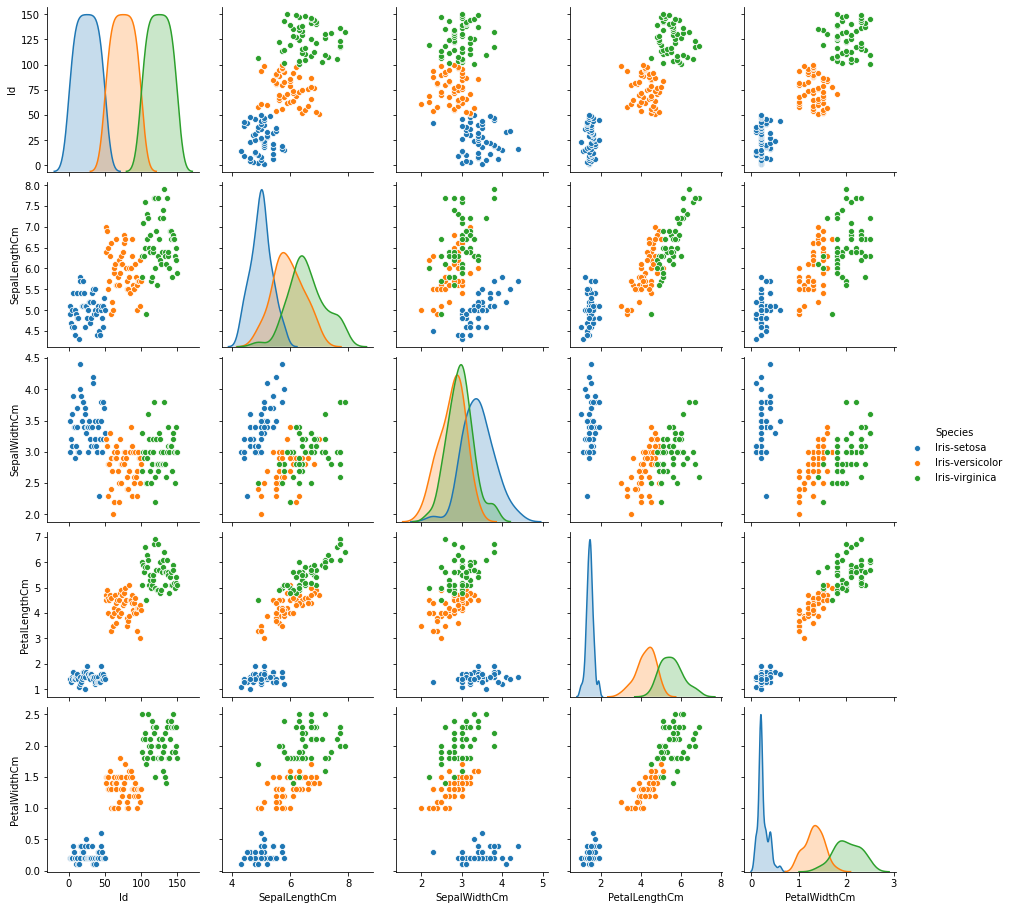

In [7]:
sns.pairplot(iris,hue='Species')

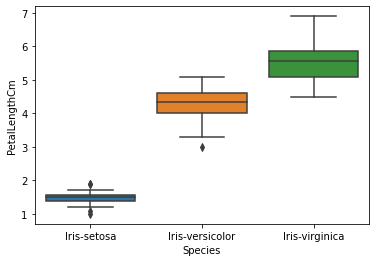

In [10]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)

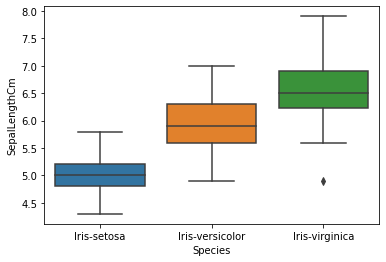

In [11]:
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)

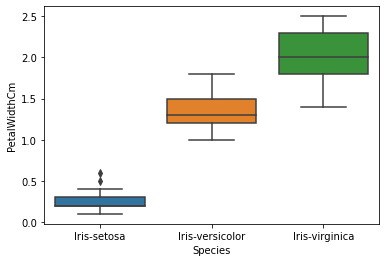

In [12]:
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)

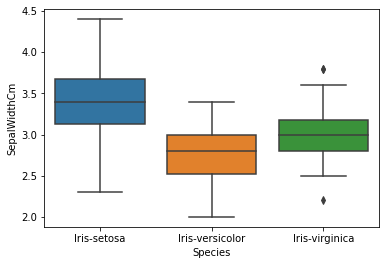

In [13]:
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)

In [26]:
#LABELING OF THE SPECIES
le_Species=LabelEncoder()

In [27]:
iris['species']=le_Species.fit_transform(iris['Species'])

In [28]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [29]:
iris_1=iris.drop('Species',axis='columns')

In [30]:
iris_1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [31]:
iris_2=iris_1.drop(['species','Id'],axis='columns')

In [32]:
target=iris_1['species']

In [33]:
iris_2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [35]:
features=iris_2.columns

In [36]:
features

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [37]:
#TRAIN TEST SPLITTING
X=iris_2
y=target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

In [38]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [17]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [18]:
conda install pydotplus


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-32/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/win-32'




In [19]:
!pip install graphviz

ERROR: Could not find a version that satisfies the requirement graphviz (from versions: none)
ERROR: No matching distribution found for graphviz


VISUALISING THE DECISION TREE

In [39]:
from six import StringIO

In [40]:
from IPython.display import Image

[Text(697.5, 996.6, 'PetalWidthCm <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(590.1923076923077, 815.4000000000001, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(804.8076923076923, 815.4000000000001, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(429.2307692307692, 634.2, 'PetalLengthCm <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(214.6153846153846, 453.0, 'PetalWidthCm <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(107.3076923076923, 271.79999999999995, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(321.9230769230769, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(643.8461538461538, 453.0, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(536.5384615384615, 271.79999999999995, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(751.1538461538462, 271.79999999999995, 'SepalLengthCm <= 6.95\ngini = 0.444\nsamples = 3\nvalue =

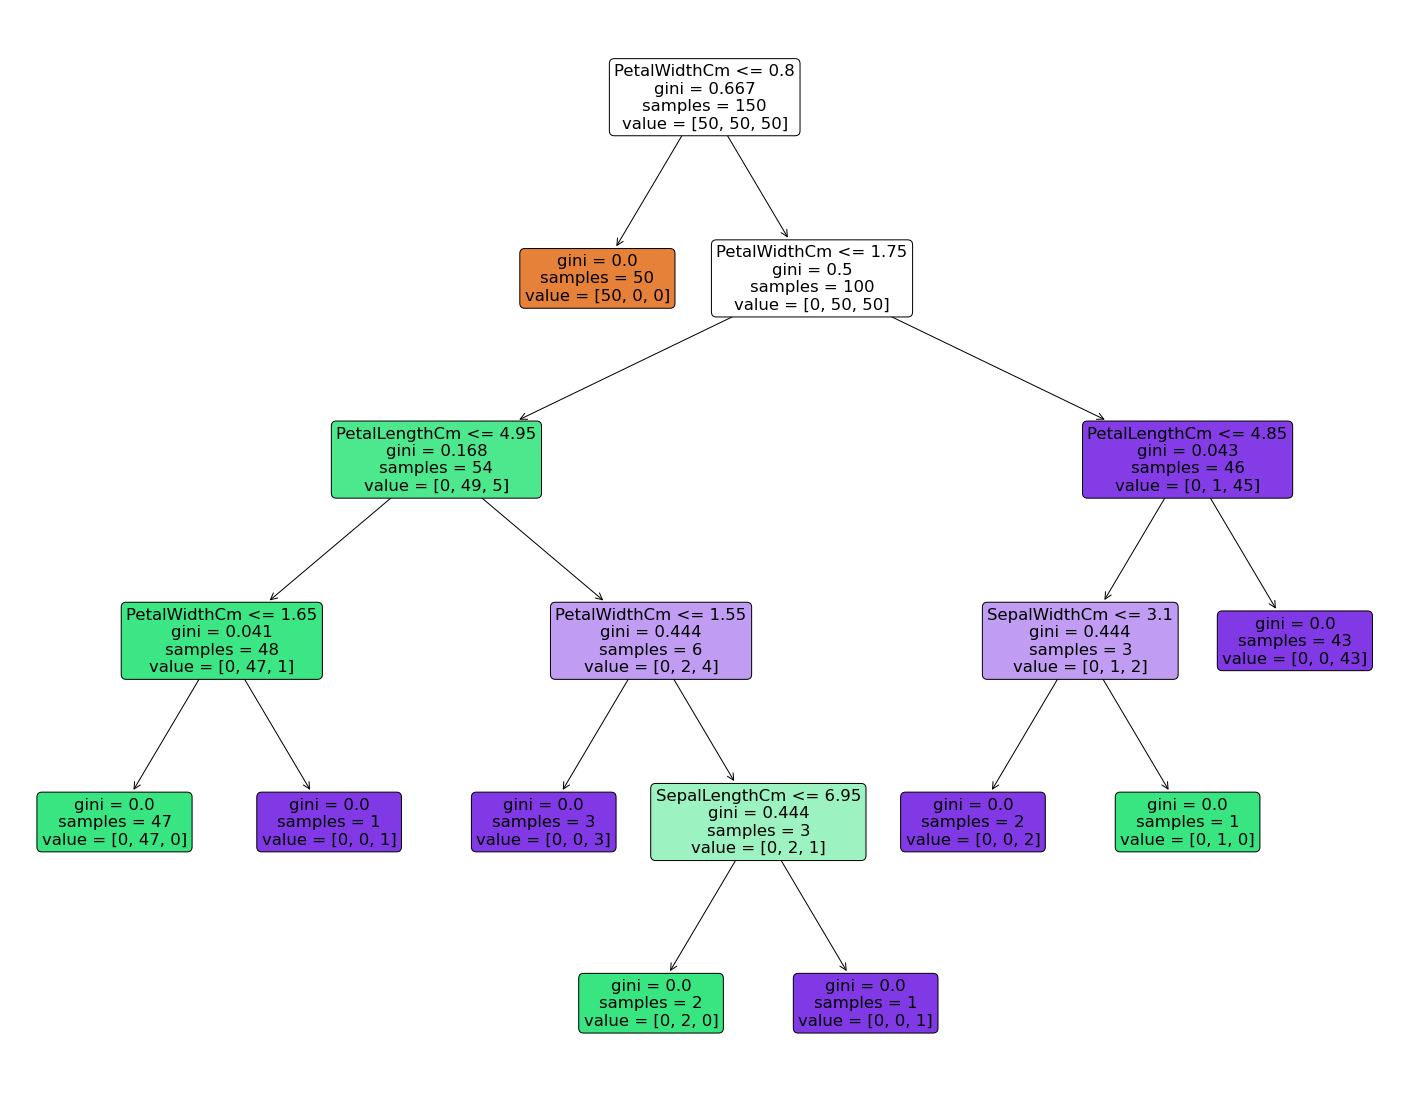

In [41]:
from sklearn import tree
fig=plt.figure(figsize=(25,20))
dot_data = StringIO()
tree.plot_tree(dtree, feature_names=features,  
                filled=True, rounded=True)


In [42]:
dtree.score(iris_2,target)

1.0

In [43]:
y_pred=dtree.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred)

1.0

we can say our classifier is doing really well

In [45]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]], dtype=int64)

In [47]:
#checking for some features
dtree.predict([[4.6,3.1,1.5,0.2]])

array([0])

yay!! it's giving right answer